#### IMPORTANTO BIBLIOTECAS

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow import keras

#### VERIFICANDO O RECONHECIMENTO DA GPU

In [2]:
print("Num GPUs Available: ", 
      len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


#### CARREGANDO CONJUNTO DE DADOS

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

#### SEPARANDO CONJUNTO DE TREINO E VALIDAÇÃO

In [4]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_test = X_test / 255.0

#### CRIANDO HASH PARA IMPRIMIR O NOME DAS CLASSES

In [5]:
class_names = ["Camiseta/Top", "Calça", "Suéter", "Vestido", "Casaco",
"Sandália", "Camisa", "Tênis", "Bolsa", "Bota"]

In [6]:
class_names[y_train[54000]]

'Bolsa'

#### VISUALIZANDO IMAGENS DO CONJUNTO DE DADOS

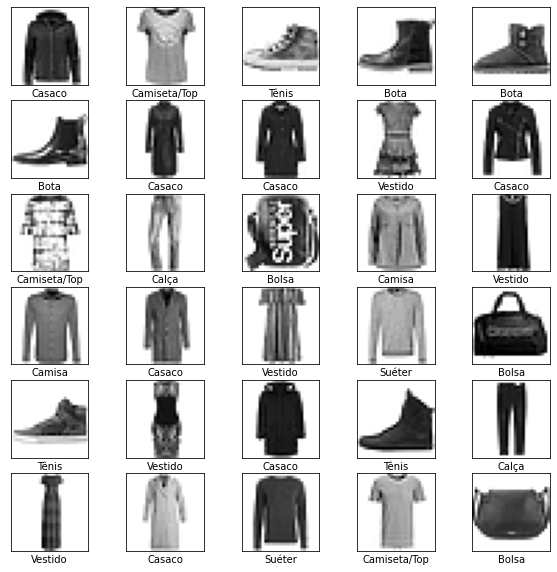

In [7]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

#### INSTACIANDO MODELO

In [8]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28, 28]),
keras.layers.Dense(300, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


#### COMPILANDO MODELO

In [10]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

#### TREINANDO MODELO

In [11]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7232 - accuracy: 0.7610 - val_loss: 0.5038 - val_accuracy: 0.8298
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4905 - accuracy: 0.8302 - val_loss: 0.4805 - val_accuracy: 0.8260
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4439 - accuracy: 0.8449 - val_loss: 0.4225 - val_accuracy: 0.8546
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4153 - accuracy: 0.8541 - val_loss: 0.3991 - val_accuracy: 0.8616
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3959 - accuracy: 0.8605 - val_loss: 0.3890 - val_accuracy: 0.8666
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3801 - accuracy: 0.8653 - val_loss: 0.3709 - val_accuracy: 0.8716
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3650 - accuracy: 0.8709 - val_loss: 0.3692 - val_accuracy:

#### AVALIANDO MODELO

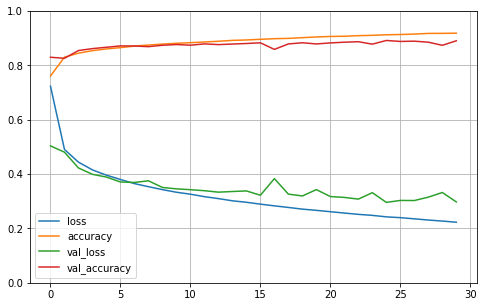

In [12]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [17]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3292 - accuracy: 0.8825


[0.329170823097229, 0.8824999928474426]

#### CLASSIFICANDO EXEMPLOS

In [16]:
X_new = X_test[:30]
y_pred = model.predict_classes(X_new)

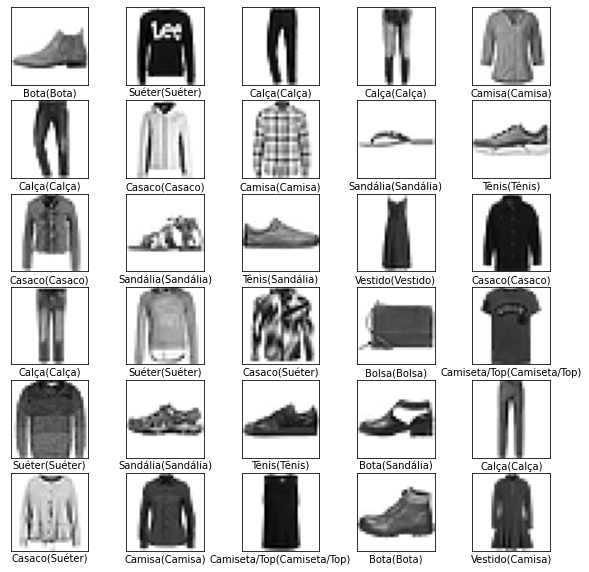

In [15]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_new[i], cmap=plt.cm.binary)
    plt.xlabel((class_names[y_test[i]]+'('+class_names[y_pred[i]]+')'))
plt.show()